# Mount Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import library

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

!pip -q install tensorflow_addons
import tensorflow_addons as tfa

from matplotlib import pyplot as plt
import os
import numpy as np
import shutil

from google.colab import files, drive
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


# Load Dataset

Kami menggunakan dataset sekunder yang berada di Kaggle:

1.   kaggle.com/alfredolorentiars/bisindo-letter-dataset
2.   kaggle.com/achmadnoer/alfabet-bisindo
3.   kaggle.com/idhamozi/indonesian-sign-language-bisindo






In [4]:
# Pindah ke direktori dataset berada
%cd /content/drive/MyDrive/dataset_capstone

/content/drive/MyDrive/dataset_capstone


In [5]:
# # Unzip file dataset
# !unzip -q "archive (6).zip" -d "dataset_1"
# !unzip -q "archive (7).zip" -d "dataset_2"
# !unzip -q "archive (8).zip" -d "dataset_3"

In [6]:
# # Menghapus file zip
# os.remove("archive (6).zip")
# os.remove("archive (7).zip")
# os.remove("archive (8).zip")

In [7]:
# Insialisasi path dataset
DATASET_BASE_DIR= 'citra_bisindo' #original path dataset
TEMP_DATASET_DIR= ['dataset_1', 'dataset_2', 'dataset_3'] #temporary dataset dari kaggle

In [8]:
# Membuat list class dataset
CLASS_LABELS= ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z"]

In [9]:
# # Membuat folder berdasarkan class dataset
# for i in CLASS_LABELS:
#     try:
#         os.makedirs(os.path.join(DATASET_BASE_DIR, i))
#     except:
#         pass

In [10]:
# # Memindahkan seluruh file pada TEMP_DATASET_DIR ke DATASET_BASE_DIR
# dummy_idx= 0

# for temp_dir in TEMP_DATASET_DIR:
#     for dirpath, dirnames, filenames in os.walk(temp_dir):
#         parent_dir= os.path.basename(os.path.normpath(dirpath))

#         if parent_dir in CLASS_LABELS:
#             for idx, i in enumerate(filenames):
#                 new_file_name= parent_dir+'_unique_'+str(dummy_idx)+'.'+i.split('.')[-1]
#                 os.rename(os.path.join(dirpath, i), os.path.join(dirpath, new_file_name))

#                 dummy_idx+= 1

#                 try:
#                     shutil.move(os.path.join(dirpath, new_file_name), os.path.join(DATASET_BASE_DIR, parent_dir, new_file_name))
#                 except Exception as e:
#                     print(e)

In [11]:
# Fungsi untuk menghitung jumlah file pada folder
def count_files(folder_path):
    count = sum([len(files) for root, dirs, files in os.walk(folder_path)])
    return count

In [12]:
# Menghitung jumlah total
citra_files = count_files(DATASET_BASE_DIR)
citra_files_class = count_files(DATASET_BASE_DIR+"/A")
print("Jumlah total gambar dataset:", citra_files)
print("Jumlah total gambar dataset pada kelas:", citra_files_class)

Jumlah total gambar dataset: 3327
Jumlah total gambar dataset pada kelas: 128


## Splitting Dataset

In [13]:
# Path untuk set pelatihan, validasi, dan pengujian
train_path = "train"
valid_path = "val"
test_path = "test"

# Path data keseluruhan
original_data_path = "citra_bisindo"

In [14]:
# Mendapatkan daftar folder kelas
class_folders = os.listdir(original_data_path)

In [15]:
# # Splitting dataset menjadi train, test, dan val
# for class_folder in class_folders:
#     class_folder_path = os.path.join(original_data_path, class_folder)
#     files = os.listdir(class_folder_path)
#     train_files, validation_test_files = train_test_split(files, test_size=0.3, random_state=42)

#     for file in train_files:
#         src_path = os.path.join(class_folder_path, file)
#         dst_path = os.path.join(train_path, class_folder, file)
#         os.makedirs(os.path.dirname(dst_path), exist_ok=True)
#         if os.path.isfile(src_path):
#             shutil.copy(src_path, dst_path)

#     validation_files, test_files = train_test_split(validation_test_files, test_size=0.5, random_state=42)

#     for file in test_files:
#         src_path = os.path.join(class_folder_path, file)
#         dst_path = os.path.join(test_path, class_folder, file)
#         os.makedirs(os.path.dirname(dst_path), exist_ok=True)
#         if os.path.isfile(src_path):
#             shutil.copy(src_path, dst_path)

#     for file in validation_files:
#         src_path = os.path.join(class_folder_path, file)
#         dst_path = os.path.join(valid_path, class_folder, file)
#         os.makedirs(os.path.dirname(dst_path), exist_ok=True)
#         if os.path.isfile(src_path):
#             shutil.copy(src_path, dst_path)

In [16]:
# Menghitung jumlah file pada masing-masing folder
citra_files = count_files(original_data_path)
train_files = count_files(train_path)
test_files = count_files(test_path)
valid_files = count_files(valid_path)

print("Number of files in 'citra':", citra_files)
print("Number of files in 'train':", train_files)
print("Number of files in 'test':", test_files)
print("Number of files in 'valid':", valid_files)

Number of files in 'citra': 3327
Number of files in 'train': 2313
Number of files in 'test': 520
Number of files in 'valid': 494


# Pre-Processing Data

In [17]:
# Inisialisasi konstan gambar
BATCH_SIZE= 32
RESIZED_IMAGE_SIZE= (224, 224)
RESIZED_IMAGE_SHAPE= RESIZED_IMAGE_SIZE+(3,)

AUTOTUNE= tf.data.experimental.AUTOTUNE

Load dataset dengan `keras.utils.image_dataset_from_directory`

In [18]:
# Resize dataset training
train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_path,
    labels='inferred',
    batch_size= BATCH_SIZE,
    image_size= RESIZED_IMAGE_SIZE,
    shuffle=True,
    seed=1
)

# Resize dataset validation
validation_dataset = tf.keras.utils.image_dataset_from_directory(
    valid_path,
    labels='inferred',
    batch_size= BATCH_SIZE,
    image_size= RESIZED_IMAGE_SIZE,
    shuffle=True,
    seed=1
)

# Resize dataset testing
test_dataset = tf.keras.utils.image_dataset_from_directory(
    test_path,
    labels='inferred',
    batch_size= BATCH_SIZE,
    image_size= RESIZED_IMAGE_SIZE,
    shuffle=True,
    seed=1
)

Found 2313 files belonging to 26 classes.
Found 494 files belonging to 26 classes.
Found 520 files belonging to 26 classes.


In [19]:
# Membuat fungsi normalisasi
def normalize(image, label):
    image = tf.cast(image, tf.float32)
    image = image / 255.

    return image, label

In [20]:
# Menerapkan fungsi normalisasi ke dataset yang sudah resized
ds_train = train_dataset.map(normalize, num_parallel_calls=AUTOTUNE)
ds_val= validation_dataset.map(normalize, num_parallel_calls=AUTOTUNE)
ds_test= test_dataset.map(normalize)

In [21]:
def view_image(ds, class_labels=None, num_plot=(1, 26), figsize=None):
    # Initialize the figure size
    if figsize is None:
        figsize = (num_plot[1] * 3, num_plot[0] * 3)

    # Create the figure
    fig = plt.figure(figsize=figsize)

    # Initialize a dictionary to hold images for each label
    images_dict = {label: [] for label in range(26)}

    # Extract images and labels from the dataset
    for data in ds:
        images, labels = data[0].numpy(), data[1].numpy()
        for img, lbl in zip(images, labels):
            if lbl < 26:
                images_dict[lbl].append(img)
            if all(len(images_dict[i]) > 0 for i in range(26)):
                break
        if all(len(images_dict[i]) > 0 for i in range(26)):
            break

    # Iterate through labels from 'A' to 'Z'
    for i in range(num_plot[0] * num_plot[1]):
        try:
            # Get the corresponding image for the current label
            ax = fig.add_subplot(num_plot[0], num_plot[1], i + 1, xticks=[], yticks=[])
            ax.imshow(images_dict[i][0])  # Select the first image for the label
            if class_labels is not None:
                ax.set_title(f"{class_labels[i]}")
        except IndexError:
            break  # Break the loop if we run out of images

    plt.show()

In [22]:
# view_image(ds_train, CLASS_LABELS)

In [23]:
# Membuat fungsi augmentasi
def augment(image, label):
    if tf.random.uniform((), minval=0, maxval=4, dtype=tf.int32) < 1:
        if tf.random.uniform((), minval=0, maxval=3, dtype=tf.int32) < 2:
            image= tf.image.random_saturation(image, lower=0.5, upper= 2.5)
        else:
            image= tf.tile(tf.image.rgb_to_grayscale(image),[1,1,1,3])

    if tf.random.uniform((), minval=0, maxval=5, dtype=tf.int32) < 1:
        if tf.random.uniform((), minval=0, maxval=2, dtype=tf.int32) < 1:
            image= tf.image.resize(image, (tf.random.uniform((), minval=RESIZED_IMAGE_SIZE[0]//8*5, maxval= RESIZED_IMAGE_SIZE[0]-10, dtype=tf.int32), RESIZED_IMAGE_SIZE[1]))
        else:
            image= tf.image.resize(image, (RESIZED_IMAGE_SIZE[0], tf.random.uniform((), minval=RESIZED_IMAGE_SIZE[1]//8*5, maxval=RESIZED_IMAGE_SIZE[1]-10, dtype=tf.int32)))

        image= tf.image.resize_with_pad(image, RESIZED_IMAGE_SIZE[0], RESIZED_IMAGE_SIZE[1])

    if tf.random.uniform((), minval=0, maxval=3, dtype=tf.int32) < 1:
        image= tfa.image.rotate(image, tf.random.uniform((), minval=-0.8, maxval=0.8, dtype=tf.float32), fill_mode='nearest')

    image = tf.image.random_flip_left_right(image)
    image= tf.clip_by_value(image, 0, 1)

    return image, label

Mengaplikasikan data pipeline pada `ds_train` dan `ds_val`

In [24]:
ds_train = ds_train.map(augment, num_parallel_calls=AUTOTUNE).shuffle(32).cache('/').prefetch(AUTOTUNE)
ds_val= ds_val.cache('/').prefetch(AUTOTUNE)

In [25]:
# view_image(ds_train, CLASS_LABELS)

# Modeling

Me-load model pre-trained ResNet50V2 tanpa top

In [26]:
base_model = keras.applications.ResNet50V2(
    input_shape=RESIZED_IMAGE_SHAPE,
    include_top=False,
    pooling='max',
    weights = "imagenet"
)

Membuat model, tapi terlebih dahulu dilakukan freeze pada `base_model`

In [27]:
base_model.trainable= False
model= keras.models.Sequential()
model.add(base_model)
model.add(layers.Dropout(0.3))
model.add(layers.Dense(len(CLASS_LABELS), 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 2048)              23564800  
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 26)                53274     
                                                                 
Total params: 23618074 (90.10 MB)
Trainable params: 53274 (208.10 KB)
Non-trainable params: 23564800 (89.89 MB)
_________________________________________________________________


In [28]:
optimizer =keras.optimizers.Adam(learning_rate=0.001)

model.compile(
    optimizer=optimizer,
    loss= 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [29]:
reduce_lr= keras.callbacks.ReduceLROnPlateau(monitor='accuracy', factor= 0.5, patience=0, min_lr=1e-5, min_delta=0.01)

history = model.fit(ds_train, epochs=5, validation_data=ds_val, batch_size=BATCH_SIZE, callbacks=[reduce_lr])

Epoch 1/5
73/73 [==============================] - 622s 5s/step - loss: 10.2196 - accuracy: 0.3225 - val_loss: 2.4632 - val_accuracy: 0.7012 - lr: 0.0010
Epoch 2/5
73/73 [==============================] - 8s 115ms/step - loss: 3.7203 - accuracy: 0.6338 - val_loss: 1.3264 - val_accuracy: 0.8262 - lr: 0.0010
Epoch 3/5
73/73 [==============================] - 9s 127ms/step - loss: 2.2177 - accuracy: 0.7475 - val_loss: 0.9306 - val_accuracy: 0.8613 - lr: 0.0010
Epoch 4/5
73/73 [==============================] - 8s 112ms/step - loss: 1.5536 - accuracy: 0.8007 - val_loss: 0.5037 - val_accuracy: 0.9023 - lr: 0.0010
Epoch 5/5
73/73 [==============================] - 9s 127ms/step - loss: 1.2079 - accuracy: 0.8387 - val_loss: 0.1324 - val_accuracy: 0.9707 - lr: 0.0010


Fine-tuning

In [30]:
base_model.trainable= True

for layer in base_model.layers:
    if isinstance(layer, layers.BatchNormalization):
        layer.trainable= False

optimizer= keras.optimizers.Adam(learning_rate=1e-5)

model.compile(
    optimizer= optimizer,
    loss= 'sparse_categorical_crossentropy',
    metrics= ['accuracy']
)

In [31]:
ft_history= model.fit(ds_train, epochs=2, validation_data=ds_val, callbacks=[reduce_lr])

Epoch 1/2
73/73 [==============================] - 46s 367ms/step - loss: 0.6655 - accuracy: 0.8876 - val_loss: 0.0214 - val_accuracy: 0.9883 - lr: 1.0000e-05
Epoch 2/2
73/73 [==============================] - 23s 317ms/step - loss: 0.2649 - accuracy: 0.9360 - val_loss: 0.0023 - val_accuracy: 1.0000 - lr: 1.0000e-05


Plot loss dan akurasi training

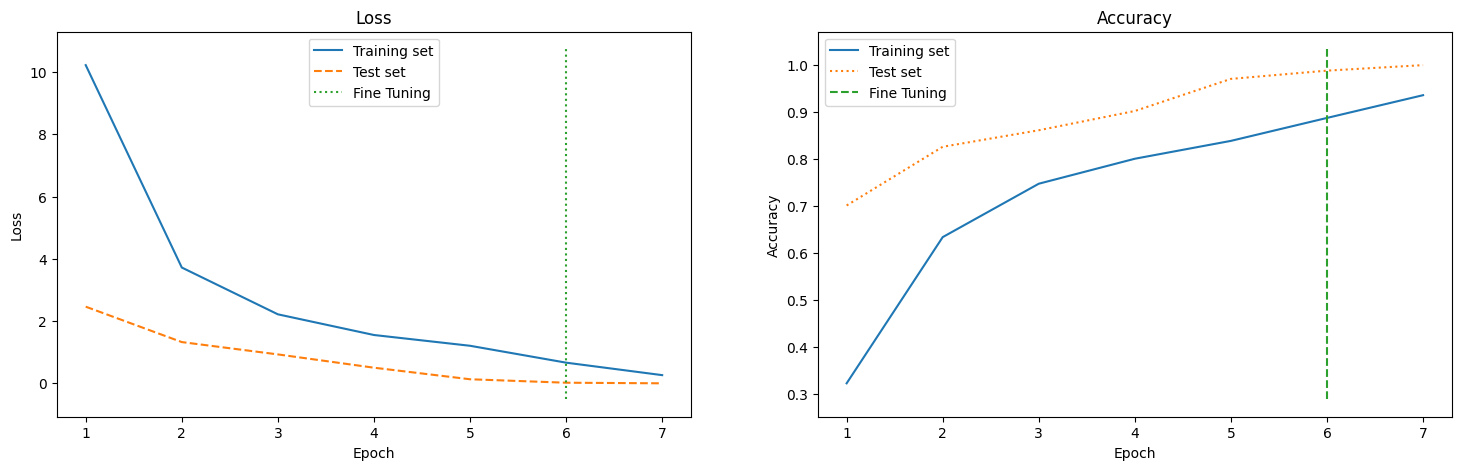

In [32]:
loss = history.history['loss'] + ft_history.history['loss']
val_loss = history.history['val_loss'] + ft_history.history['val_loss']

accuracy = history.history['accuracy'] + ft_history.history['accuracy']
val_accuracy = history.history['val_accuracy'] + ft_history.history['val_accuracy']

plt.figure(figsize=(18, 5))

plt.subplot(1, 2, 1)
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(list(range(7)), list(range(1,8)))
plt.plot(loss, label='Training set')
plt.plot(val_loss, label='Test set', linestyle='--')
plt.plot([5, 5], plt.ylim(),label='Fine Tuning',linestyle='dotted')
plt.legend()

plt.subplot(1, 2, 2)
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xticks(list(range(7)), list(range(1,8)))
plt.plot(accuracy, label='Training set')
plt.plot(val_accuracy, label='Test set', linestyle='dotted')
plt.plot([5, 5], plt.ylim(), label='Fine Tuning', linestyle='--')
plt.legend()

plt.show()

# Evaluasi

Untuk evaluasi, akan digunakan pada data baru yang dibuat secara pribadi.

In [34]:
model.evaluate(ds_test)

17/17 [==============================] - 173s 5s/step - loss: 0.1712 - accuracy: 0.9654


[0.1711568683385849, 0.9653846025466919]

In [35]:
def view_image_and_predict(ds, class_labels=None, num_plot=(6,3), figsize=None):
    data = next(iter(ds))
    image = data[0].numpy()
    label = data[1].numpy()

    if figsize is None:
        figsize= (num_plot[1]*3, num_plot[0]*3)

    fig = plt.figure(figsize=figsize)

    for i in range(num_plot[0]*num_plot[1]):
        try:
            ax = fig.add_subplot(num_plot[0], num_plot[1], i+1, xticks=[], yticks=[])
            ax.imshow(image[i])

            predicted= np.argmax(model.predict(tf.expand_dims(image[i], 0)))
            is_correct= 'correct' if predicted==label[i] else 'incorrect'
            ax.set_title(f'predict: {class_labels[int(predicted)]}, true: {class_labels[label[i]]}')
        except:
            pass

1/1 [==============================] - 0s 22ms/step


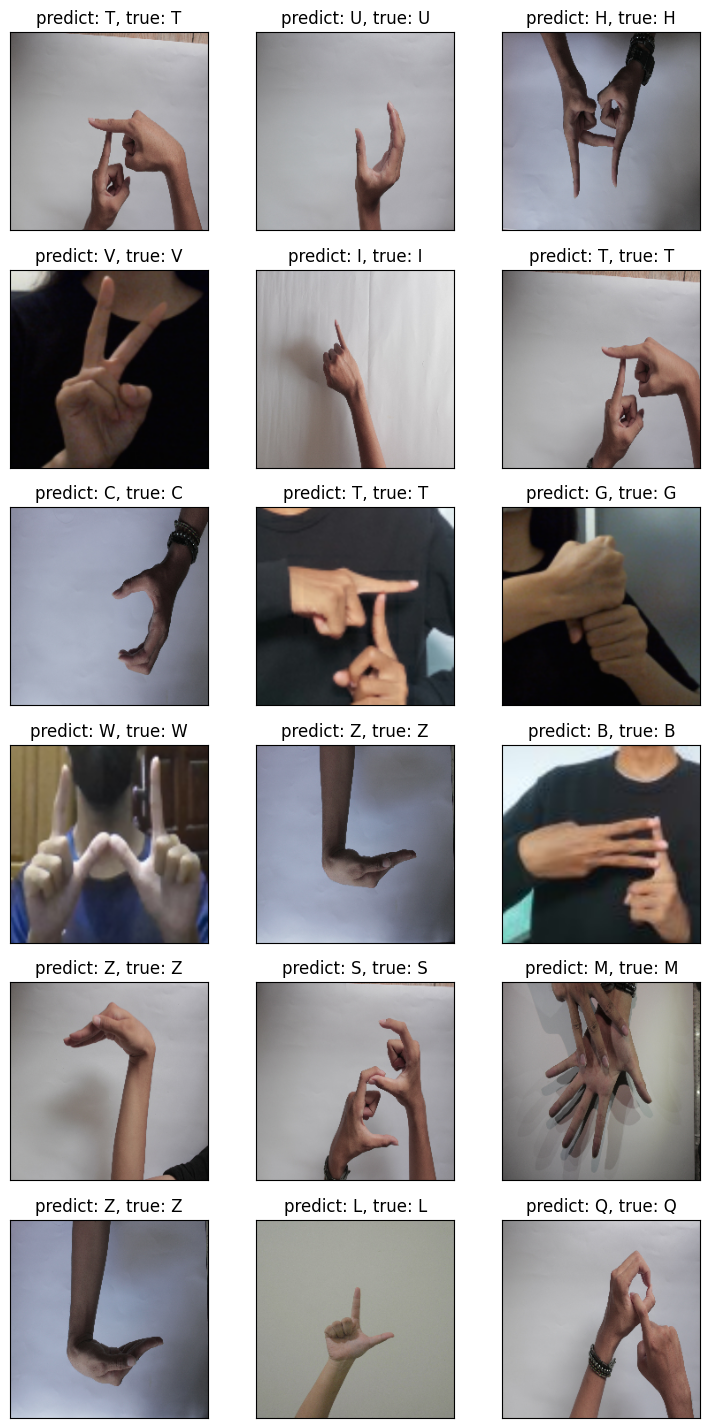

In [36]:
view_image_and_predict(ds_test, CLASS_LABELS)

In [37]:
#model.save('model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
